
Cipher is : OBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF

{'O': 0.15584415584415584, 'B': 0.03896103896103896, 'U': 0.02857142857142857, 'E': 0.06493506493506493, 'W': 0.015584415584415584, 'L': 0.012987012987012988, 'I': 0.025974025974025976, 'Q': 0.046753246753246755, 'Y': 0.05714285714285714, 'N': 0.015584415584415584, 'V': 0.05974025974025974, 'A': 0.015584415584415584, 'P': 0.12207792207792208, 'Z': 0.06493506493506493, 'F': 0.07792207792207792, 'C': 0.025974025974025976, 'G': 0.07272727272727272, 'S': 0.02077922077922078, 'M': 0.015584415584415584, 'J': 0.0

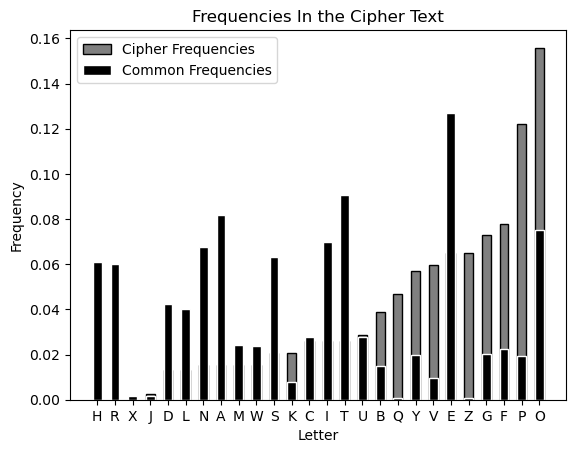

{'H': 'Z', 'R': 'Q', 'X': 'X', 'J': 'J', 'D': 'K', 'L': 'V', 'N': 'B', 'A': 'P', 'M': 'Y', 'W': 'G', 'S': 'F', 'K': 'W', 'C': 'M', 'I': 'U', 'T': 'C', 'U': 'L', 'B': 'D', 'Q': 'R', 'Y': 'H', 'V': 'S', 'E': 'N', 'Z': 'I', 'G': 'O', 'F': 'A', 'P': 'T', 'O': 'E'}
EDLNGE VU RELEHBHSP TIHA DETTER UNM ORE NSE NF TIE FEY LINAES TN BHAHT MA OT TIE FHFTI SEJT GNSTI OSW TOKE CORT NF TIE EDELTHNS CRNLEAA YE INCE TIOT UNM IOBE TIE CNAAHVHDHTU TN PHBE MA TIE CDEOAMRE NF UNMR LNGCOSU OSW TIOT UNM OLLECT TI  INSNMR OA YEDD OA TIE REACNSAHVHDHTU NF TIHA OAAHPSGEST TIHA UEOR TIE GEETHSP YHDD TOKE CDOLE OT KESAHSPTNS SHSE TOKE TIE VMA TIREE IMSWREW TYEDBE AEBES ATOTHNSA FRNG TIE LESTROD KEEC TIE OWWREAA OA YEDD OA TIE WOU O AELRET VEAT REPORWA


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#global from : https://mathcenter.oxford.emory.edu/site/math125/englishLetterFreqs/
commonFreq = "ETAOINSHRDLCUMWFGYPBVKJXQZ"
lcf = [c for c in commonFreq]
commonVals = [ 0.12702, 0.09056, 0.08167, 0.07507, 0.06966, 0.06749, 0.06327, 0.06094, 0.05987, 0.04253, 0.04025, 0.02782, 0.02758, 0.02406, 0.02360, 0.02228, 0.02015, 0.01974, 0.01929, 0.01492, 0.00978, 0.00772, 0.00153, 0.00150, 0.00095, 0.00074 ]




def freq(cipher: str) -> dict:
    d = {}
    ignore = {}
    for ch in cipher: 
        if ch.isalpha():
            if ch in d: 
                d[ch] += 1
            else: 
                d[ch] = 1
        else:
            if ch in ignore: 
                ignore[ch] += 1
            else: 
                ignore[ch] = 1
    for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        if c not in d: 
            d[c] = 0

    for x in d: 
        d[x] /= len(cipher) - sum(list(ignore.values()))
    return d

def crack(cipher: str) -> str: 
    mapOfFreq = freq(cipher)
    print(f"\n{mapOfFreq}")
    
    letterKeys = list(mapOfFreq.keys())
    lettervals = list(mapOfFreq.values())
    print(f"Sum of values : {sum(lettervals)}")

    for i in range(len(letterKeys)): 
        for j in range(i, len(letterKeys)): 
            if lettervals[i] > lettervals[j]:
                lettervals[i], lettervals[j] = lettervals[j], lettervals[i]
                letterKeys[i], letterKeys[j] = letterKeys[j], letterKeys[i]
    
    def plotFreq(d: dict): 
        barW = 0.5
        print(f"{len(commonFreq)}\n")


        print(f"length of both keys and vals : {len(letterKeys), len(lettervals)}")
        plt.bar(letterKeys, lettervals, color='gray', edgecolor='black', width=barW, label='Cipher Frequencies')
        plt.bar(lcf, commonVals, color='k',edgecolor='white', width=barW, label='Common Frequencies')
        plt.title("Frequencies In the Cipher Text")
        plt.xlabel('Letter')
        plt.ylabel('Frequency')
        # plt.xticks([r + barW for r in range(len(lettervals))], letterKeys)
        plt.legend()
        plt.show()

    plotFreq(mapOfFreq) 
    cipher_to_common = {}
    i = 0
    cfreverse = commonFreq[::-1]
    for k in letterKeys:
        cipher_to_common[k] = cfreverse[i]
        i+=1 

    print(cipher_to_common)
    char_list = []
    
    for c in cipher:
        if not c.isalpha(): 
            char_list.append(c) 
        else:
            char_list.append(cipher_to_common[c]) 
    decrypt = "".join(char_list)
    return decrypt

def main(): 
    ct = input("Enter the Cipher Text")
    print(f"\nCipher is : {ct}")
    first_pass_decrpyt = crack(ct.upper())
    print(first_pass_decrpyt)

if __name__ == "__main__": 
    main() 

# MOBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF